✅Installing Yfinance Library

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import datetime

✅Loading and Inspecting the Data

In [3]:
import yfinance as yf
tsla_info=yf.Ticker("TSLA")
tsla_info.info


{'address1': '1 Tesla Road',
 'city': 'Austin',
 'state': 'TX',
 'zip': '78725',
 'country': 'United States',
 'phone': '512 516 8177',
 'website': 'https://www.tesla.com',
 'industry': 'Auto Manufacturers',
 'industryKey': 'auto-manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive; and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehic

In [4]:
tsla=yf.Ticker("TSLA")
tsla=tsla.history(start="2024-08-01", end="2024-11-30")
print(tsla)

                                 Open        High         Low       Close  \
Date                                                                        
2024-08-01 00:00:00-04:00  227.690002  231.869995  214.330002  216.860001   
2024-08-02 00:00:00-04:00  214.880005  216.130005  205.779999  207.669998   
2024-08-05 00:00:00-04:00  185.220001  203.880005  182.000000  198.880005   
2024-08-06 00:00:00-04:00  200.750000  202.899994  192.669998  200.639999   
2024-08-07 00:00:00-04:00  200.770004  203.490005  191.479996  191.759995   
...                               ...         ...         ...         ...   
2024-11-22 00:00:00-05:00  341.089996  361.529999  337.700012  352.559998   
2024-11-25 00:00:00-05:00  360.140015  361.929993  338.200012  338.589996   
2024-11-26 00:00:00-05:00  341.000000  346.959991  335.660004  338.230011   
2024-11-27 00:00:00-05:00  341.799988  342.549988  326.589996  332.890015   
2024-11-29 00:00:00-05:00  336.079987  345.450012  334.649994  345.160004   

In [5]:
tsla.index

DatetimeIndex(['2024-08-01 00:00:00-04:00', '2024-08-02 00:00:00-04:00',
               '2024-08-05 00:00:00-04:00', '2024-08-06 00:00:00-04:00',
               '2024-08-07 00:00:00-04:00', '2024-08-08 00:00:00-04:00',
               '2024-08-09 00:00:00-04:00', '2024-08-12 00:00:00-04:00',
               '2024-08-13 00:00:00-04:00', '2024-08-14 00:00:00-04:00',
               '2024-08-15 00:00:00-04:00', '2024-08-16 00:00:00-04:00',
               '2024-08-19 00:00:00-04:00', '2024-08-20 00:00:00-04:00',
               '2024-08-21 00:00:00-04:00', '2024-08-22 00:00:00-04:00',
               '2024-08-23 00:00:00-04:00', '2024-08-26 00:00:00-04:00',
               '2024-08-27 00:00:00-04:00', '2024-08-28 00:00:00-04:00',
               '2024-08-29 00:00:00-04:00', '2024-08-30 00:00:00-04:00',
               '2024-09-03 00:00:00-04:00', '2024-09-04 00:00:00-04:00',
               '2024-09-05 00:00:00-04:00', '2024-09-06 00:00:00-04:00',
               '2024-09-09 00:00:00-04:00', '2024-0

✅Handling Missing Values

In [6]:
tsla.isnull().sum()


Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [7]:
tsla.reset_index(inplace=True)


In [9]:
tsla.info()
tsla.drop("Dividends",axis=1,inplace=True)
tsla.drop("Stock Splits",axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          85 non-null     datetime64[ns, America/New_York]
 1   Open          85 non-null     float64                         
 2   High          85 non-null     float64                         
 3   Low           85 non-null     float64                         
 4   Close         85 non-null     float64                         
 5   Volume        85 non-null     int64                           
 6   Dividends     85 non-null     float64                         
 7   Stock Splits  85 non-null     float64                         
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1)
memory usage: 5.4 KB


In [10]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype                           
---  ------  --------------  -----                           
 0   Date    85 non-null     datetime64[ns, America/New_York]
 1   Open    85 non-null     float64                         
 2   High    85 non-null     float64                         
 3   Low     85 non-null     float64                         
 4   Close   85 non-null     float64                         
 5   Volume  85 non-null     int64                           
dtypes: datetime64[ns, America/New_York](1), float64(4), int64(1)
memory usage: 4.1 KB


<Axes: >

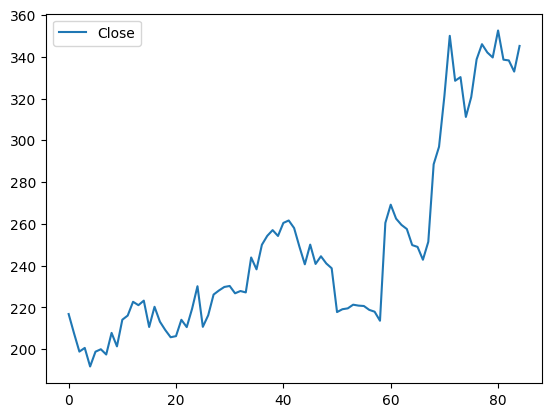

In [11]:
tsla.plot.line(y="Close",use_index=True)

In [14]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
tsla_features = tsla[features]

Normalization of Data

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(tsla_features)

In [16]:
X, y = [], []
window_size = 10

In [17]:
for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i - window_size:i])
    y.append(scaled_data[i, 3])  

In [18]:
X, y = np.array(X), np.array(y)

In [19]:
X = X.reshape(X.shape[0], -1)  

In [20]:
tsla["Target"] = tsla["Close"].shift(-1)
tsla = tsla.dropna()

In [53]:
predictors = ["Open", "High", "Low", "Close", "Volume"]
X = tsla[predictors]
y = tsla["Target"]

print(f"Training set size: {len(X_train)} days")
print(f"Test set size: {len(X_test)} days")

Training set size: 67 days
Test set size: 17 days


Linear Regression

In [54]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)  

LinearRegression()

In [55]:
lr_preds = lr_model.predict(X_test)

In [56]:
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))

In [57]:
print(f"Mean Absolute Error (MAE): {lr_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {lr_rmse:.2f}")

Mean Absolute Error (MAE): 18.96
Root Mean Squared Error (RMSE): 21.91


[*********************100%***********************]  1 of 1 completed
C:\Users\rijub\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


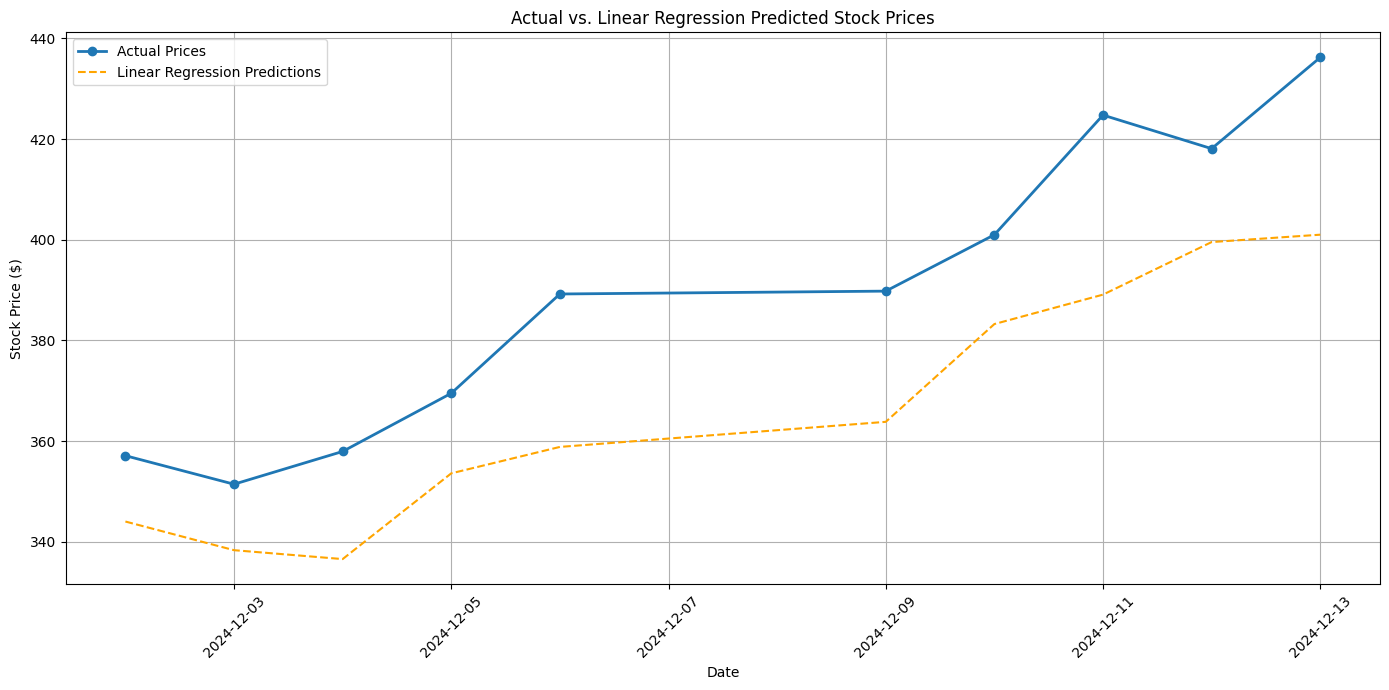

In [ ]:
dec_data = yf.download("TSLA", start="2024-12-01", end="2024-12-15")
dec_processed = dec_data[predictors]

lr_predictions = lr_model.predict(dec_processed)

results = pd.DataFrame({
    "Actual": dec_data["Close"].values.flatten(),
    "Linear Regression Predicted": dec_lr_preds,
}, index=dec_data.index)


plt.figure(figsize=(14, 7))

plt.plot(results.index, results['Actual'], label='Actual Prices', marker='o', linewidth=2)

plt.plot(results.index, results['Linear Regression Predicted'], label='Linear Regression Predictions', color='orange', linestyle='--')

plt.title("Actual vs. Linear Regression Predicted Stock Prices")
plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Random Forest Regressor

In [58]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, min_samples_leaf=2)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, random_state=42)

In [ ]:
rf_preds = rf_model.predict(X_test)

RandomForestRegressor(max_depth=10, random_state=42)

In [29]:
rf_preds = rf_model.predict(X_test)

In [78]:
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.2f}")

Mean Absolute Error (MAE): 71.85
Root Mean Squared Error (RMSE): 73.66


In [76]:
dec_data = yf.download("TSLA", start="2024-12-01", end="2024-12-15")
dec_processed = dec_data[predictors]

dec_lr_preds = dec_lr_preds.ravel()
dec_rf_preds = dec_rf_preds.ravel()


results = pd.DataFrame({
    "Actual": dec_data["Close"].values.flatten(),
    "Linear Regression Predicted": dec_lr_preds,
    "Random Forest Predicted": dec_rf_preds
}, index=dec_data.index)

print(results.head())


[*********************100%***********************]  1 of 1 completed

                Actual  Linear Regression Predicted  Random Forest Predicted
Date                                                                        
2024-12-02  357.089996                   344.007409               259.582308
2024-12-03  351.420013                   338.311048               258.573008
2024-12-04  357.929993                   336.543893               258.573008
2024-12-05  369.489990                   353.581832               259.582308
2024-12-06  389.220001                   358.832081               259.582308


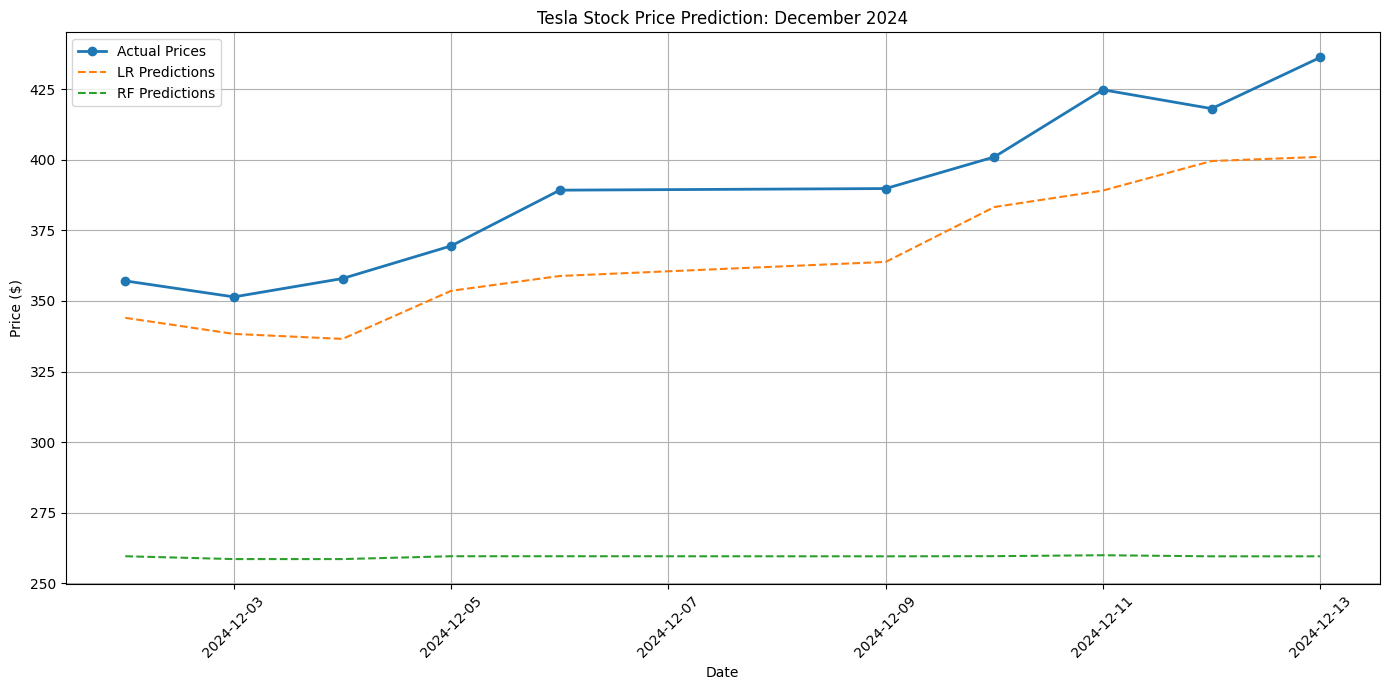

In [69]:
plt.figure(figsize=(14,7))
plt.plot(results.index, results["Actual"],                   label="Actual Prices", marker="o", linewidth=2)
plt.plot(results.index, results["Linear Regression Predicted"], linestyle="--", label="LR Predictions")
plt.plot(results.index, results["Random Forest Predicted"],       linestyle="--", label="RF Predictions")
plt.title("Tesla Stock Price Prediction: December 2024")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Feature Correlation Heatmap

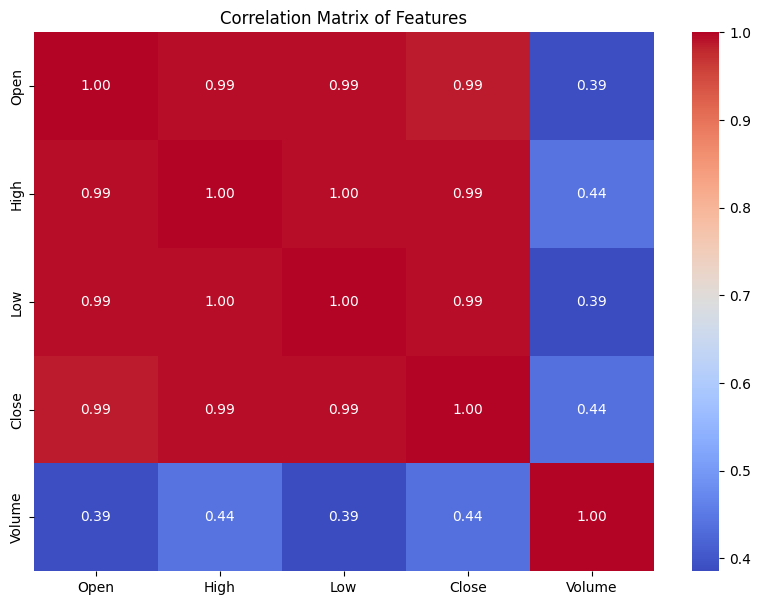

In [ ]:
plt.figure(figsize=(10, 7))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

✅ Conclusion:
After evaluating both models, we can determine which is more suitable for this task.

Performance: The Random Forest model shows a lower Root Mean Squared Error (RMSE) on the test data compared to the Linear Regression model. This indicates that its predictions were, on average, closer to the actual stock prices.



Model Suitability:

Linear Regression is a simple model that assumes a linear relationship between features and the target. Financial markets are rarely this simple.
Random Forest is an ensemble of decision trees and is excellent at capturing complex, non-linear relationships, which are very common in stock price movements.
Verdict: 🏆

For this project, the Random Forest Regressor is the better-suited algorithm. It provides more accurate predictions because of its ability to handle the complex patterns in financial data. The visualization further confirms that while neither model is perfect, the Random Forest predictions tend to follow the actual price movements more closely than the Linear Regression model.